In [12]:
!pip install evaluate

In [13]:
import evaluate

# Evaluate 使用說明

## 查看支援哪些評估函數


In [14]:
evaluate.list_evaluation_modules(
  module_type="comparison",
  include_community=False,
  with_details=True)


[]

In [22]:
# include community 允許包含huggingface社群

evaluate.list_evaluation_modules(include_community=False, with_details=True)


[]

## 導入評估函數

In [18]:
accuracy = evaluate.load("accuracy")

## 查看函數使用方法和屬性

| Attribute          | Description                                      |
|--------------------|--------------------------------------------------|
| description      | A short description of the evaluation module.   |
| citation       | A BibTex string for citation when available.    |
| features        | A Features object defining the input format.    |
| inputs_description | This is equivalent to the module's docstring. |
| homepage        | The homepage of the module.                      |
| license         | The license of the module.                       |
| codebase_urls    | Link to the code behind the module.              |
| reference_urls   | Additional reference URLs.                       |


In [19]:
print(accuracy.description)


Accuracy is the proportion of correct predictions among the total number of cases processed. It can be computed with:
Accuracy = (TP + TN) / (TP + TN + FP + FN)
 Where:
TP: True positive
TN: True negative
FP: False positive
FN: False negative



In [20]:
print(accuracy.inputs_description)


Args:
    predictions (`list` of `int`): Predicted labels.
    references (`list` of `int`): Ground truth labels.
    normalize (`boolean`): If set to False, returns the number of correctly classified samples. Otherwise, returns the fraction of correctly classified samples. Defaults to True.
    sample_weight (`list` of `float`): Sample weights Defaults to None.

Returns:
    accuracy (`float` or `int`): Accuracy score. Minimum possible value is 0. Maximum possible value is 1.0, or the number of examples input, if `normalize` is set to `True`.. A higher score means higher accuracy.

Examples:

    Example 1-A simple example
        >>> accuracy_metric = evaluate.load("accuracy")
        >>> results = accuracy_metric.compute(references=[0, 1, 2, 0, 1, 2], predictions=[0, 1, 1, 2, 1, 0])
        >>> print(results)
        {'accuracy': 0.5}

    Example 2-The same as Example 1, except with `normalize` set to `False`.
        >>> accuracy_metric = evaluate.load("accuracy")
        >>> res

In [21]:
accuracy

EvaluationModule(name: "accuracy", module_type: "metric", features: {'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)}, usage: """
Args:
    predictions (`list` of `int`): Predicted labels.
    references (`list` of `int`): Ground truth labels.
    normalize (`boolean`): If set to False, returns the number of correctly classified samples. Otherwise, returns the fraction of correctly classified samples. Defaults to True.
    sample_weight (`list` of `float`): Sample weights Defaults to None.

Returns:
    accuracy (`float` or `int`): Accuracy score. Minimum possible value is 0. Maximum possible value is 1.0, or the number of examples input, if `normalize` is set to `True`.. A higher score means higher accuracy.

Examples:

    Example 1-A simple example
        >>> accuracy_metric = evaluate.load("accuracy")
        >>> results = accuracy_metric.compute(references=[0, 1, 2, 0, 1, 2], predictions=[0, 1, 1, 2, 1, 0])
        >>> print(results)
    

## 評估函數計算——全局計算

In [23]:
accuracy = evaluate.load("accuracy")
results = accuracy.compute(references=[0, 1, 2, 0, 1, 2], predictions=[0, 1, 1, 2, 1, 0])
results

{'accuracy': 0.5}

## 評估函數計算——疊代計算

In [24]:
accuracy = evaluate.load("accuracy")
for ref, pred in zip([0,1,0,1], [1,0,0,1]):
    accuracy.add(references=ref, predictions=pred)
accuracy.compute()


{'accuracy': 0.5}

In [25]:
# batch 每批兩筆數據 (0,1), (0,1)
accuracy = evaluate.load("accuracy")
for refs, preds in zip([[0,1],[0,1]], [[1,0],[0,1]]):
    accuracy.add_batch(references=refs, predictions=preds)
accuracy.compute()



{'accuracy': 0.5}

## 多數個評估函數計算

In [26]:
clf_metrics = evaluate.combine(["accuracy", "f1", "recall", "precision"])
clf_metrics


In [27]:
clf_metrics


In [29]:
dir(clf_metrics)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_merge_results',
 'add',
 'add_batch',
 'compute',
 'evaluation_module_names',
 'evaluation_modules',
 'force_prefix']

In [30]:
clf_metrics.compute(predictions=[0, 1, 0], references=[0, 1, 1])


{'accuracy': 0.6666666666666666,
 'f1': 0.6666666666666666,
 'recall': 0.5,
 'precision': 1.0}

## 評估函數結果視覺化呈現

In [31]:
from evaluate.visualization import radar_plot   # 目前只支持雷达图

In [32]:
data = [
   {"accuracy": 0.99, "precision": 0.8, "f1": 0.95, "latency_in_seconds": 33.6},
   {"accuracy": 0.98, "precision": 0.87, "f1": 0.91, "latency_in_seconds": 11.2},
   {"accuracy": 0.98, "precision": 0.78, "f1": 0.88, "latency_in_seconds": 87.6},
   {"accuracy": 0.88, "precision": 0.78, "f1": 0.81, "latency_in_seconds": 101.6}
   ]
model_names = ["Model 1", "Model 2", "Model 3", "Model 4"]



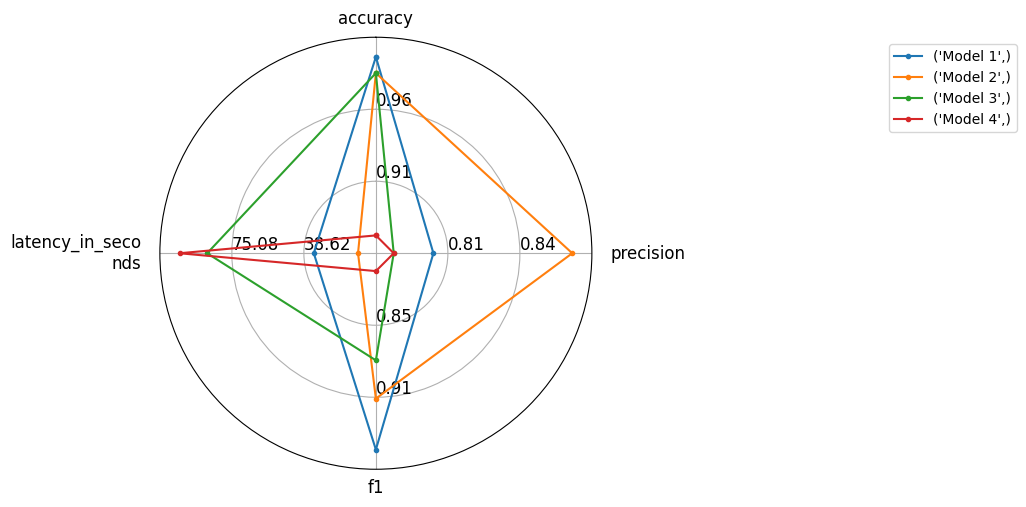

In [33]:
plot = radar_plot(data=data, model_names=model_names)